################################################################################
# ML > SL > Classification > Logistic Regression
################################################################################

In [1]:
using Plots

In [2]:
gr(size = (600, 600))

Plots.GRBackend()

In [3]:
# plot logistic (sigmoid) curve

logistic(x) = 1 / (1 + exp(-x))

logistic (generic function with 1 method)

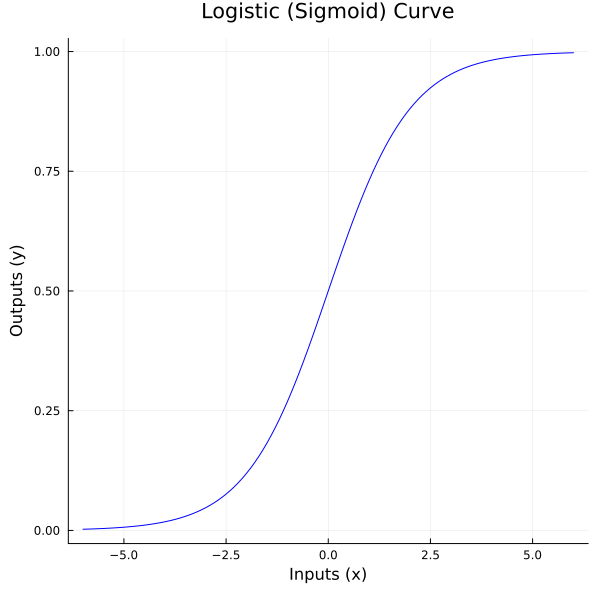

In [4]:
# plot logistic function

p_logistic = plot(-6:0.1:6, logistic,
    xlabel = "Inputs (x)",
    ylabel = "Outputs (y)",
    title = "Logistic (Sigmoid) Curve",
    legend = false,
    color = :blue
)

In [22]:
# modify logistic curve

# initialize parameters

theta_0 = 0.0    # y-intercept (default = 0 | try 1 & -1)

theta_1 = -0.5    # slope (default = 1 | try 0.5 & -0.5)

-0.5

In [23]:
# hypothesis function

z(x) = theta_0 .+ theta_1 * x

h(x) = 1 ./ (1 .+ exp.(-z(x)))

h (generic function with 1 method)

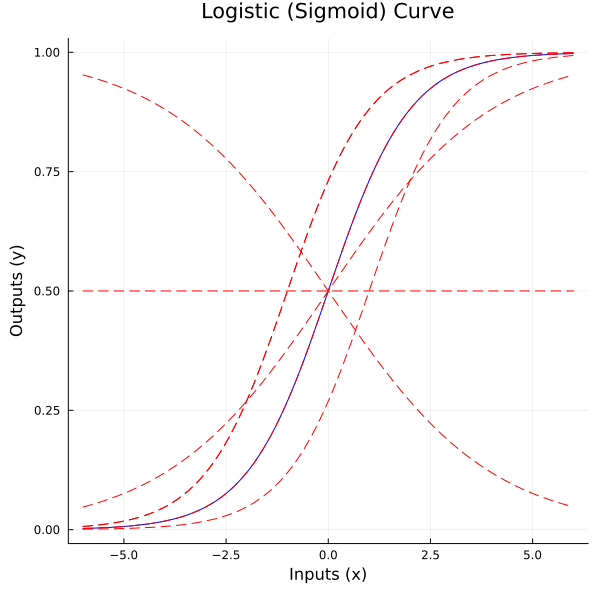

In [24]:
# re-plot

plot!(h, color = :red, linestyle = :dash)

In [25]:
# use CSV package to import data from CSV file

using CSV

data = CSV.File("wolfspider.csv")

X = data.feature

Y_temp = data.class

Y = []

for i in 1:length(Y_temp)
    if Y_temp[i] == "present"
        y = 1.0
    else
        y = 0.0
    end
    push!(Y, y)
end

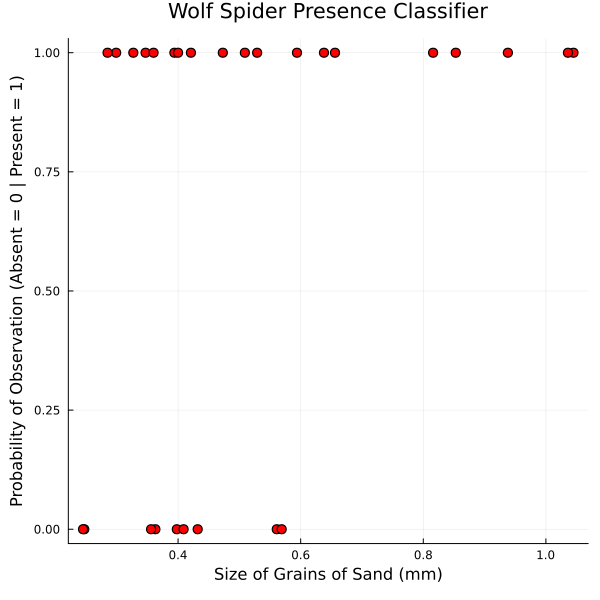

In [26]:
# plot data

p_data = scatter(X, Y,
    xlabel = "Size of Grains of Sand (mm)",
    ylabel = 
        "Probability of Observation (Absent = 0 | Present = 1)",
    title = "Wolf Spider Presence Classifier",
    legend = false,
    color = :red,
    markersize = 5
)

################################################################################
# Logistic Regression Model
################################################################################

In [27]:
# initialize parameters

theta_0 = 0.0    # y-intercept (default = 0)

theta_1 = 1.0    # slope (default = 1)

1.0

In [28]:
# track parameter value history

t0_history = []

t1_history = []

push!(t0_history, theta_0)

push!(t1_history, theta_1)

1-element Vector{Any}:
 1.0

In [30]:
# define hypothesis function

z(x) = theta_0 .+ theta_1 * x

h(x) = 1 ./ (1 .+ exp.(-z(x)))

h (generic function with 1 method)

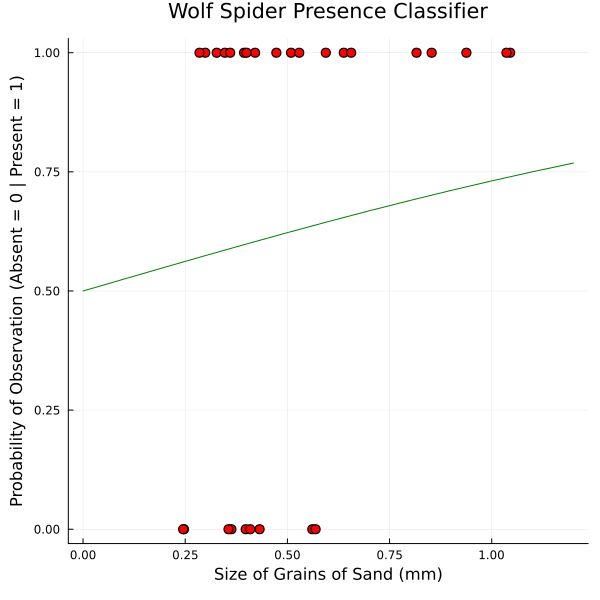

In [31]:
# plot initial hypothesis

plot!(0:0.1:1.2, h, color = :green)

In [32]:
# use cost function from Andrew Ng

m = length(X)

y_hat = h(X)

function cost()
    (-1 / m) * sum(
        Y .* log.(y_hat) +
        (1 .- Y) .* log.(1 .- y_hat)
    )
end

J = cost()

0.6010705917827384

In [33]:
# track cost value history

J_history = []

push!(J_history, J)

1-element Vector{Any}:
 0.6010705917827384

In [34]:
# define batch gradient descent algorithm

# use partial derivative formulae from Andrew Ng

function pd_theta_0()
    sum(y_hat - Y)
end

function pd_theta_1()
    sum((y_hat - Y) .* X)
end


pd_theta_1 (generic function with 1 method)

In [35]:
# set learning rate (alpha)

alpha = 0.01

0.01

In [36]:
# initialize epochs

epochs = 0

0

################################################################################
# begin iterations (repeat until convergence)
################################################################################


In [38]:
    # calculate partial derivatives

    theta_0_temp = pd_theta_0()

    theta_1_temp = pd_theta_1()

-1.5354668670801392

In [39]:
    # adjust parameters by the learning rate

    theta_0 -= alpha * theta_0_temp

    theta_1 -= alpha * theta_1_temp

    push!(t0_history, theta_0)

    push!(t1_history, theta_1)

2-element Vector{Any}:
 1.0
 1.0153546686708015

In [40]:
    # recalculate cost

    y_hat = h(X)

    J = cost()

    push!(J_history, J)

2-element Vector{Any}:
 0.6010705917827384
 0.5994854341545527

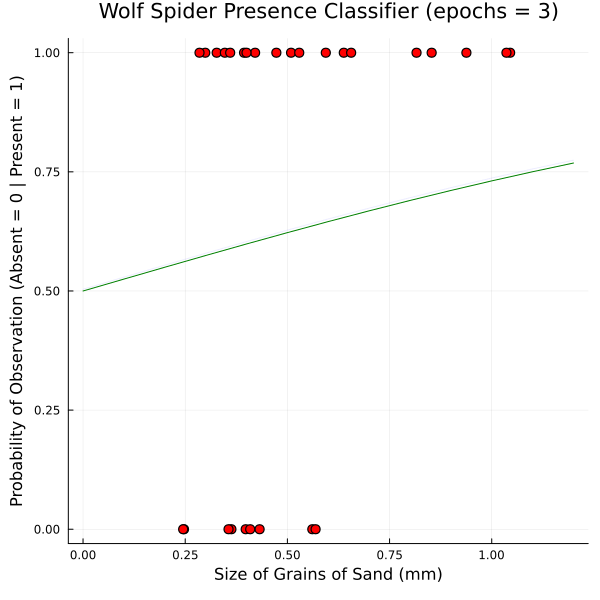

In [ ]:
    # replot prediction

    epochs += 1

    plot!(0:0.1:1.2, h, color = :blue, alpha = 0.025,
        title = 
            "Wolf Spider Presence Classifier (epochs = $epochs)"
    )

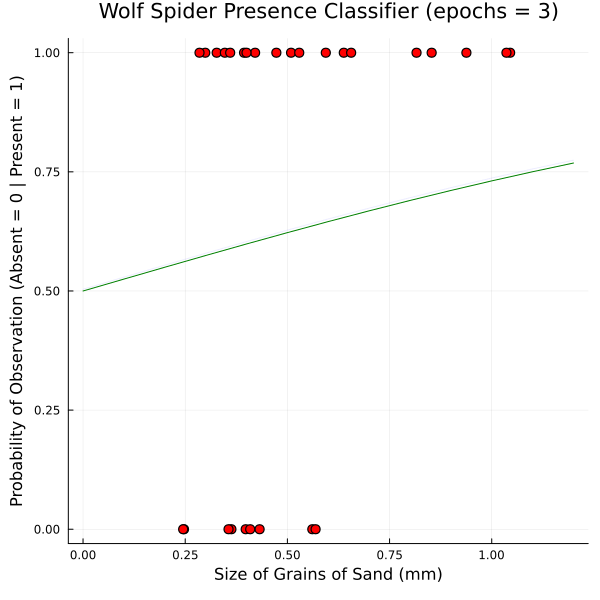

In [45]:
p_data

In [ ]:
################################################################################
# end iterations
################################################################################

In [46]:
# plot learning curve

p_l_curve = plot(0:epochs, J_history,
    xlabel = "Epochs",
    ylabel = "Cost",
    title = "Learning Curve",
    legend = false,
    color = :blue,
    linewidth = 2
)

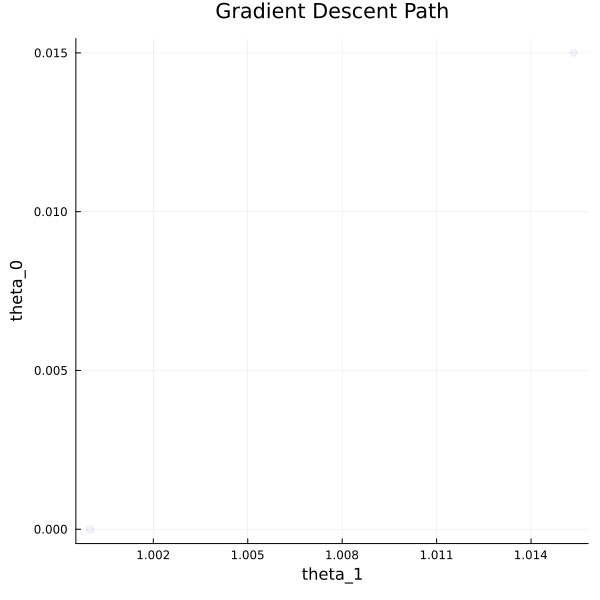

In [49]:
# plot parameters

p_params = scatter(t1_history, t0_history,
    xlabel = "theta_1",
    ylabel = "theta_0",
    title = "Gradient Descent Path",
    legend = false,
    color = :blue,
    alpha = 0.05
)

In [48]:
# make predictions

newX = [0.25, 0.5, 0.75, 1.0]

h(newX)

4-element Vector{Float64}:
 0.5668091069591112
 0.6277748686583767
 0.6849299158526205
 0.7369856996983096